In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
'''
simulation path of geometric brownian motion

Stock path and simulation
'''

def Path_simulate(paths, steps, T, mu, sigma, S0):
    
    np.random.seed(1)
    
    Z = np.random.normal(0.0, 1.0, [paths, steps])
    X = np.zeros([paths, steps+1])
    S = np.zeros([paths, steps+1])
    time = np.zeros([steps+1])
    
    #print(np.shape(X))
    #print(np.shape(S))
    
    X[:,0] = np.log(S0)
    dt = T/float(steps)
    
    for i in range(steps):
        
        if paths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i]))/np.std(Z[:,i])
            
        X[:,i+1] = X[:,i] + (mu - 0.5 * sigma**2)*dt + sigma * np.sqrt(dt)*Z[:,i]
        time[i+1] = time[i] + dt
        
    S = np.exp(X)
    
    path = {"time":time, "X":X, "S":S}
    
    return path


In [30]:
p = Path_simulate(paths = 250, steps = 500, T = 1, mu = 0.05, sigma = 0.4, S0 = 100)

In [31]:
timeGrid = p['time']
x = p["X"]
s = p["S"]

In [32]:
np.shape(timeGrid)

(501,)

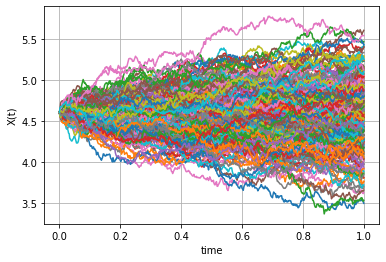

In [33]:
plt.figure(1)
plt.plot(timeGrid, np.transpose(x))   
plt.grid()
plt.xlabel("time")
plt.ylabel("X(t)")
plt.show()    
    
    

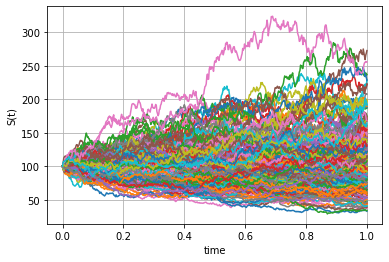

In [34]:
plt.figure(2)
plt.plot(timeGrid, np.transpose(s))   
plt.grid()
plt.xlabel("time")
plt.ylabel("S(t)")
plt.show()

In [35]:
print(np.shape(np.transpose(s)))

(501, 250)


In [36]:
# checking martingale property

print(np.mean(s[:,-1])) # 103 does not equal to 100, not a martingale


105.58065809716639


In [37]:
M = lambda r,t: np.exp(r*t)

np.mean(s[:,-1]/M(0.05,1)) #after discounting, more close to 

100.43142864017425